In [36]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
 

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.set_page_load_timeout(60)

url = "https://www.hltv.org/stats/players?startDate=2017-01-01&endDate=2022-12-30&rankingFilter=Top30"
driver.get(url)
driver.implicitly_wait(20)
accept_cookies_button = driver.find_element(By.XPATH, '//*[@id="CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll"]')
accept_cookies_button.click()


In [ ]:
import pandas as pd

# Locate all player rows
player_rows = driver.find_elements(By.XPATH, '//table[@class="stats-table player-ratings-table"]/tbody/tr')
i = 1

# Initialize lists to store player data
names = []
countries = []
maps_played = []
rounds_played = []
rating = []
kd_diffs = []
kds = []
links = []
ratings = []

for row in player_rows:
    name_element = row.find_element(By.CLASS_NAME, 'playerCol')
    name = name_element.text
    country = name_element.find_element(By.TAG_NAME, 'img').get_attribute('title')
    player_link = name_element.find_element(By.TAG_NAME, 'a').get_attribute('href')
    maps = row.find_element(By.CLASS_NAME, 'statsDetail').text
    rounds = row.find_element(By.CLASS_NAME, 'statsDetail.gtSmartphone-only').text
    kd_diff = driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[2]/div[1]/div[2]/table/tbody/tr['+str(i)+']/td[5]').text
    kd = driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[2]/div[1]/div[2]/table/tbody/tr['+str(i)+']/td[6]').text
    rating = driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/table/tbody/tr['+str(i)+']/td[7]').text
    i += 1                                                                                                                             
    
    # Append player data to respective lists
    names.append(name)
    countries.append(country)
    maps_played.append(maps)
    rounds_played.append(rounds)
    kd_diffs.append(kd_diff)
    kds.append(kd)
    links.append(player_link)
    ratings.append(rating)

driver.quit()




In [165]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

headshot = []
adr = []
kpr = []
kast = []
dpr = []

for url in links:
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    driver.implicitly_wait(10)
    accept_cookies_button = driver.find_element(By.XPATH, '//*[@id="CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll"]')
    accept_cookies_button.click()


    # Locate the headshot element
    headshot.append(driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/div[9]/div/div[1]/div[2]/span[2]').text.replace('%',''))
    adr.append(driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/div[9]/div/div[1]/div[5]/span[2]').text)
    kpr.append(driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/div[9]/div/div[2]/div[2]/span[2]').text)
    kast.append(driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/div[6]/div[2]/div[2]/div[3]/div[2]/div[1]').text.replace('%','')/html/body/div[4]/div[5]/div[2]/div[1]/div[2]/table/tbody/tr[1]/td[5])

    driver.quit()  

In [181]:
# Create a DataFrame using the player data
data = {
    'Name': names,
    'Country': countries,
    'Maps Played': maps_played,
    'Rounds Played': rounds_played,
    'K-D Diff': kd_diffs,
    'K/D': kds,
    'Headshot %': headshot,
    'ADR': adr,
    'KPR': kpr,
    'KAST': kast,
    'Rating 2.0': rating
}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('player_stats.xlsx', index=False)

In [11]:
df


,Name,Country,Maps Played,Rounds Played,K-D Diff,K/D,Headshot %,ADR,KPR,KAST,Rating 2.0
0,s1mple,Ukraine,1048,27905,6852,1.40,40.6,85.7,0.85,74.5,1.30
1,ZywOo,France,756,20164,4274,1.35,39.2,84.5,0.81,75.0,1.29
2,NiKo,Bosnia and Herzegovina,1133,30248,3725,1.19,50.2,85.3,0.78,71.3,1.20
3,device,Denmark,937,24730,3763,1.25,33.7,79.8,0.77,71.2,1.19
4,blameF,Denmark,620,16898,2066,1.20,40.0,83.5,0.74,72.5,1.18
...,...,...,...,...,...,...,...,...,...,...,...
102,denis,Germany,529,13991,-1388,0.86,44.3,70.9,0.63,65.6,0.95
103,TACO,Brazil,807,21226,-1688,0.88,50.4,65.1,0.58,68.0,0.93
104,friberg,Sweden,539,14272,-1545,0.85,46.3,69.6,0.60,67.3,0.93
105,karrigan,Denmark,1106,29408,-3234,0.84,46.7,68.5,0.59,66.4,0.93


In [63]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('player_stats.xlsx')

mean_hs = df['Headshot %'].mean()
print("Mean Headshot %:", mean_hs)
df_sorted = df.sort_values(by='ADR', ascending=False)
top_players = df_sorted.head(10)
top_players

Mean Headshot %: 45.831775700934585


,Name,Country,Maps Played,Rounds Played,K-D Diff,K/D,Headshot %,ADR,KPR,KAST,Rating 2.0
0,s1mple,Ukraine,1048,27905,6852,1.40,40.6,85.7,0.85,74.5,1.30
2,NiKo,Bosnia and Herzegovina,1133,30248,3725,1.19,50.2,85.3,0.78,71.3,1.20
5,XANTARES,Turkey,966,25930,2109,1.12,53.3,85.2,0.76,70.9,1.17
1,ZywOo,France,756,20164,4274,1.35,39.2,84.5,0.81,75.0,1.29
21,tabseN,Germany,1010,27207,725,1.04,48.7,83.6,0.73,68.8,1.11
4,blameF,Denmark,620,16898,2066,1.20,40.0,83.5,0.74,72.5,1.18
9,EliGE,United States,1053,28142,1718,1.09,48.6,82.5,0.74,70.7,1.14
6,electroNic,Russia,1007,26779,2173,1.13,49.5,81.9,0.73,71.8,1.15
12,huNter-,Bosnia and Herzegovina,766,20702,1521,1.11,50.8,81.9,0.74,70.6,1.13
16,Ethan,United States,693,18530,684,1.05,48.9,80.9,0.71,71.7,1.12


Como acertar Headshot da mais dano ao inimigo, pensamos que os players com maior dano médio por round(ADR) seriam aqueles que acertam mais Headshots. É possível notar alguns outliers como o s1mple, ZywOo e blameF, contudo, isso faz sentido já que os três jogam de AWP (Sniper) o que também da mais dano ao inimigo e não necessariamente é um Headshot.

Portanto, conseguimos concluir que a teoria estava certa, mesmo com outliers, conseguimos identificar o motivo deles estarem na lista.

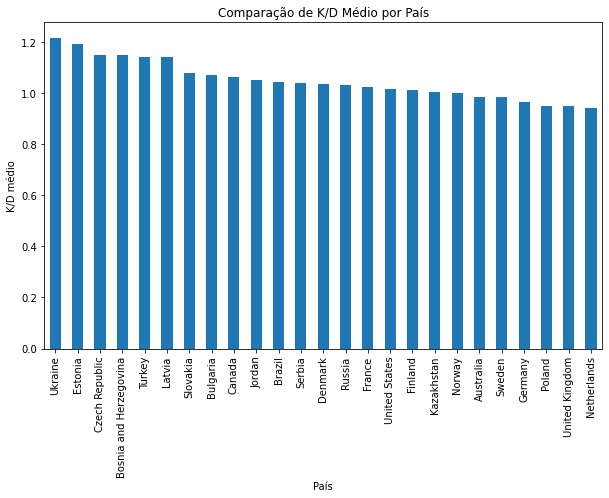

País com o maior K/D médio: Ukraine


In [64]:
# Agrupando jogadores por país e calculando a média de K/D para cada país
grouped_df = df.groupby('Country')['K/D'].mean()
country_with_highest_kd = grouped_df.idxmax()

grouped_df_sorted = grouped_df.sort_values(ascending=False)
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
grouped_df_sorted.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('K/D médio')
plt.title('Comparação de K/D Médio por País')

# Exibindo o gráfico
plt.show()

print("País com o maior K/D médio:", country_with_highest_kd)

Contudo, percebemos que essa análise não levava em consideração a quantidade de players e como a média depende da quantidade de players, achamos justo analisar o K/D para países com mais de 5 players no ranking.

In [65]:

# Agrupando jogadores por país e calculando a média de K/D para cada país
players_count = df.groupby('Country').size()

# Filtrando países com mais de 5 jogadores
countries_5_more =  players_count[players_count >=5]

filtered_df = df[df['Country'].isin(countries_5_more.index)]

result_df = filtered_df.groupby('Country')['K/D'].mean().reset_index()

result_df.sort_values(by='K/D', ascending=False)


,Country,K/D
0,Brazil,1.043750
1,Denmark,1.034500
4,Russia,1.032222
2,France,1.024444
6,United States,1.013750
5,Sweden,0.983077
3,Germany,0.965000


In [66]:
#Decidimos fazer a mesma coisa mas com ADR
players_count = df.groupby('Country').size()

# Filtrando países com mais de 5 jogadores
countries_5_more =  players_count[players_count >=5]

filtered_df = df[df['Country'].isin(countries_5_more.index)]

result_df = filtered_df.groupby('Country')['ADR'].mean().reset_index()

result_df.sort_values(by='ADR', ascending=False)

,Country,ADR
6,United States,75.912500
1,Denmark,74.700000
0,Brazil,74.512500
5,Sweden,74.446154
2,France,74.288889
4,Russia,74.166667
3,Germany,72.750000


Para entender melhor o nosso dataframe, decidimos fazer um mapa de calor e analisar as correlações

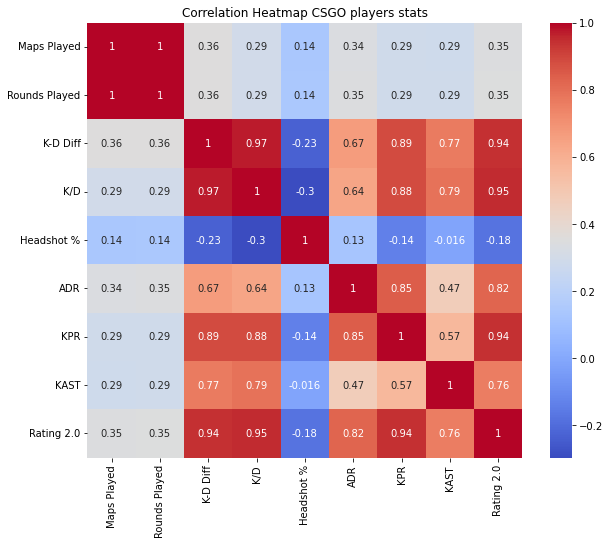

In [67]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Heatmap CSGO players stats')

plt.show()



Com o mapa de calor, é perceptível que a quantidade de mapas e rounds jogados não tem muita relação com as estatísticas dos jogadores. Além disso, é interessante que o mapa não indica grandes relações com a porcentagem de Headshot, isso mostra que a porcentagem por si só não é fácil de ser analisada. Um grande contraponto é a porcentagem de Headshot e o dano médio por round (ADR), em que na nossa análise, foi concluido que, tirando os outliers que jogam de AWP(sniper), eles têm relação.

Outra coisa interessante revelada pelo mapa de calor é que provavelmente o cálculo feito pela HLTV para gerar o Rating 2.0 leva em consideração todas as estatísticas dos players em que eu fiz o scrapping, ou seja, talvez seja uma variável que conseguimos prever com Machine Learning. Por fim, é curioso notar que o dano médio por round (ADR), tem menos correlação com o K/D, K-D-Diff e o KAST (Kill-Assist Survival Percentage) do jogador, o que faz sentido, pois esses consideram a morte do player como uma estatística relevante.

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['Maps Played', 'Rounds Played', 'K-D Diff', 'K/D', 'Headshot %', 'ADR', 'KPR', 'KAST']
target = 'Rating 2.0'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("Root Mean Squared Error (RMSE):", rmse)




Root Mean Squared Error (RMSE): 0.008195438598864405


In [69]:
# Predict the Rating 2.0 for new players

new_players = pd.DataFrame([[1000, 25000, 5000, 1.25, 40.0, 80.0, 0.85, 75.0], 
                            [800, 22000, 4000, 1.15, 35.0, 90.0, 0.80, 70.0],
                            [45, 1234, 36, 1.04, 50.5, 79.7, 0.72, 70.6 ],
                            [228, 5973, 1273, 1.36, 49.0, 82.8, 0.81, 75.2]],
                           columns=features)
new_players_pred = regression_model.predict(new_players)
print("Predicted Rating 2.0 for new players:")
print("Aleatorio:",new_players_pred[0])
print("Aleatorio:",new_players_pred[1])
print("Biguzera nos últimos 3 meses:",new_players_pred[2])
print("Coldzera em 2017:",new_players_pred[3])

Predicted Rating 2.0 for new players:
Aleatorio: 1.2282982745291868
Aleatorio: 1.2141670701898888
Biguzera nos últimos 3 meses: 1.0894686871307948
Coldzera em 2017: 1.2427438838154292


O modelo de regressão funciona e aproxima do valor real calculado pela HLTV.

Isso é perceptível pelos valores do jogador Biguzera em que o rating oficial dos últimos 3 meses foi de **1.09** e o previsto pelo modelo foi de **1.0894686871307948**

<img src="./Biguzera.png" alt="Biguzera HLTV" width="800" height="600">

E também pelos valores do jogador Coldzera em que o rating oficial de 2017 foi de **1.23** e o previsto pelo modelo foi de **1.2427438838154292**

<img src="./Coldzera.png" alt="Biguzera HLTV" width="800" height="600">

Dessa forma, pode-se concluir que o modelo funciona, não só para valores atuais, mas também para valores de anos anteriores.
